# [DATA SCIENCE CHALLENGE SCL WEEK 1](#)
## [Predict Cardano Price](https://github.com/jesussantana/Predict-Cardano-Price)  
## Models
*************
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
 
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  

[![Linkedin: Jesus Santana](https://img.shields.io/badge/-JesusSantana-blue?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/chus-santana/)](https://www.linkedin.com/in/chus-santana/)  
[![GitHub JesusSantana](https://img.shields.io/github/followers/jesussantana?label=follow&style=social)](https://github.com/jesussantana) 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
# ==============================================================================
# Auto Import Dependencies
# ==============================================================================
# pyforest imports dependencies according to use in the notebook
# ==============================================================================

In [2]:
#!pip install mplfinance
#import mplfinance as mpf
#!pip install keras
#!pip install tensorflow
#!pip install imblearn

In [4]:
# Dependencies not Included in Auto Import*
# ==============================================================================
import time

import keras
from tensorflow import keras as ks

from keras.layers import TimeDistributed
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.callbacks import ModelCheckpoint

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# # Graphics
# ==============================================================================
import matplotlib.ticker as ticker
from matplotlib import style
import matplotlib.pyplot as plotter
import plotly.express as px

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)
path = "../data/"

# Explore Dataset
**********

In [5]:
df_train = pd.read_csv(path + 'raw/train.csv')

In [6]:
df_test = pd.read_csv(path + 'raw/test_predictors.csv')

In [7]:
df_train.head()

,Open_time,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility,target
0,2021-05-13 09:00:00,1.6625,1.6800,1.6623,1.6737,2878032.99,4.821304e+06,5125,1702161.28,2.851617e+06,0.673684,0
1,2021-05-13 09:05:00,1.6738,1.6790,1.6686,1.6733,2723854.15,4.558141e+06,4318,1516726.12,2.538139e+06,-0.029872,0
2,2021-05-13 09:10:00,1.6734,1.6749,1.6496,1.6514,3653708.06,6.075417e+06,5561,1625405.03,2.702822e+06,-1.314689,1
3,2021-05-13 09:15:00,1.6515,1.6708,1.6500,1.6693,3313388.75,5.505110e+06,5374,1797877.23,2.987432e+06,1.077808,0
4,2021-05-13 09:20:00,1.6690,1.6728,1.6587,1.6668,3478711.17,5.794350e+06,5799,1736515.81,2.892649e+06,-0.131815,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12701 entries, 0 to 12700
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_time   12701 non-null  object 
 1   Open        12701 non-null  float64
 2   High        12701 non-null  float64
 3   Low         12701 non-null  float64
 4   Close       12701 non-null  float64
 5   Volume      12701 non-null  float64
 6   QV          12701 non-null  float64
 7   NOT         12701 non-null  int64  
 8   TBB         12701 non-null  float64
 9   TBQ         12701 non-null  float64
 10  Volatility  12701 non-null  float64
 11  target      12701 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 1.2+ MB


In [9]:
df_test.head()

,Open_time,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility
0,2021-06-26 11:25:00,1.2420,1.2439,1.2401,1.2423,762888.34,9.471762e+05,991,492672.20,6.116442e+05,0.024155
1,2021-06-26 11:30:00,1.2424,1.2461,1.2422,1.2449,768319.91,9.560712e+05,1025,355521.71,4.423621e+05,0.201223
2,2021-06-26 11:35:00,1.2449,1.2497,1.2440,1.2451,920008.82,1.147285e+06,1519,413771.18,5.159426e+05,0.016066
3,2021-06-26 11:40:00,1.2451,1.2520,1.2444,1.2477,3320275.56,4.146741e+06,3218,2066342.58,2.580730e+06,0.208819
4,2021-06-26 11:45:00,1.2476,1.2570,1.2442,1.2552,1347381.74,1.686204e+06,2446,715783.34,8.958810e+05,0.609170


In [10]:
df_test.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_time   5 non-null      object 
 1   Open        5 non-null      float64
 2   High        5 non-null      float64
 3   Low         5 non-null      float64
 4   Close       5 non-null      float64
 5   Volume      5 non-null      float64
 6   QV          5 non-null      float64
 7   NOT         5 non-null      int64  
 8   TBB         5 non-null      float64
 9   TBQ         5 non-null      float64
 10  Volatility  5 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 568.0+ bytes


In [11]:
def convert_time(df):

  df = df.sort_values('Open_time')

  df['Year'] = [int(x[:4]) for x in df['Open_time'] ]
  df['Month'] = [int(x[5:7]) for x in df['Open_time'] ]
  df['Day'] = [int(x[8:11]) for x in df['Open_time'] ]

  df['Hour'] = [int(x[11:13]) for x in df['Open_time'] ]
  df['Minute'] = [int(x[14:16]) for x in df['Open_time'] ]

  df['Open_time'] = [time.mktime(time.strptime(x, "%Y-%m-%d %H:%M:%S")) for x in df['Open_time'] ]

  return df

In [12]:
df_train = convert_time(df_train)
df_test = convert_time(df_test)

# Train Test
**********

In [13]:
cols = df_train.columns
cols = cols.drop("target")

X_train = df_train[cols]
y_train = df_train["target"]

In [14]:
# Transform Dataset
# ==============================================================================
# strategy = {0:15000, 1:10000, 2:10000}
strategy = {0:20000, 1:5000, 2:5000}
oversample = SMOTE(sampling_strategy=strategy)

# X_train_over, y_train_over = X_train, y_train
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

y_train_over = to_categorical(y_train_over, num_classes=3)

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()

X_train_over = scaler.fit_transform(X_train_over)
# X_train_over = X_train_over.copy()

X_test = scaler.fit_transform(df_test)

In [16]:
pd.DataFrame(y_train_over).value_counts()

0    1    2  
1.0  0.0  0.0    20000
0.0  0.0  1.0     5000
     1.0  0.0     5000
dtype: int64

In [17]:
# [samples, timesteps, features].
timesteps = 20
samples = int(X_train_over.shape[0]/timesteps)
features = len(cols)

X_train_reshape = np.array(X_train_over).reshape(samples, timesteps, features)
y_train_reshape = np.array(y_train_over).reshape(samples, timesteps, 3)
X_train_reshape.shape

(1500, 20, 16)

In [18]:
y_train_reshape

array([[[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]],

       ...,

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]], dtype=float32)

# Model
************

In [19]:
model = Sequential()
model.add(LSTM(500, dropout=0.25, input_shape=( timesteps, features ),return_sequences=True))

model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 500)           1034000   
_________________________________________________________________
dense (Dense)                (None, 20, 3)             1503      
Total params: 1,035,503
Trainable params: 1,035,503
Non-trainable params: 0
_________________________________________________________________


In [20]:
checkpoint_filepath = 'model.h5'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [21]:
X_train_orig = scaler.fit_transform(X_train[:-1])
y_train_orig = to_categorical(y_train[:-1], num_classes=3)

In [22]:
timesteps = 20
samples = int(X_train_orig.shape[0]/timesteps)
features = len(cols)

X_train_orig_reshape = np.array(X_train_orig).reshape(samples, timesteps, features)
y_train_orig_reshape = np.array(y_train_orig).reshape(samples, timesteps, 3)
X_train_orig_reshape.shape

(635, 20, 16)

In [23]:
history = model.fit(X_train_reshape, y_train_reshape, epochs=3000, batch_size=512, verbose=0, callbacks=[model_checkpoint_callback],
          validation_data=(X_train_orig_reshape, y_train_orig_reshape))

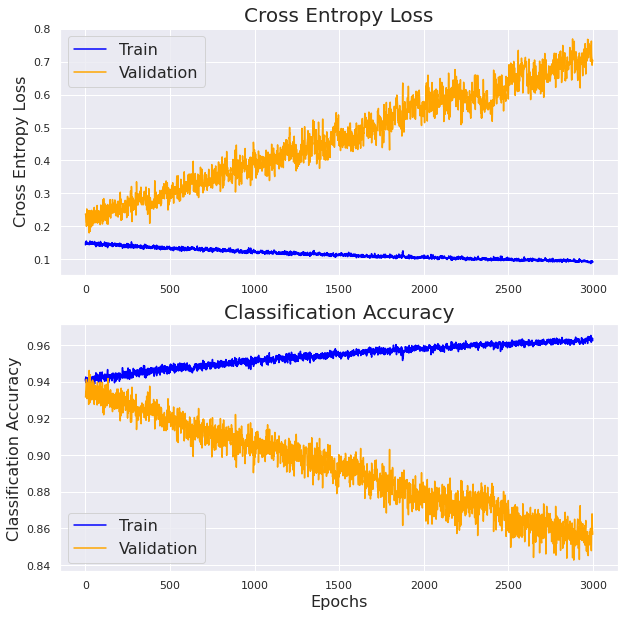

In [25]:

fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].set_title('Cross Entropy Loss', fontsize = 20)
ax[0].plot(history.history['loss'], color='blue', label='Train')
ax[0].plot(history.history['val_loss'], color='orange', label='Validation')
ax[0].set_ylabel('Cross Entropy Loss', fontsize = 16)
ax[0].legend(fontsize = 16)

ax[1].set_title('Classification Accuracy', fontsize = 20)
ax[1].plot(history.history['accuracy'], color='blue', label='Train')
ax[1].plot(history.history['val_accuracy'], color='orange', label='Validation')
ax[1].set_ylabel('Classification Accuracy', fontsize = 16)
ax[1].set_xlabel('Epochs', fontsize = 16)
ax[1].legend(fontsize = 16)

plt.show()

# Analysis
************

In [26]:
best_model = load_model('model.h5')
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 500)           1034000   
_________________________________________________________________
dense (Dense)                (None, 20, 3)             1503      
Total params: 1,035,503
Trainable params: 1,035,503
Non-trainable params: 0
_________________________________________________________________


In [27]:
p = pd.DataFrame(best_model.predict(X_train_reshape).reshape(X_train_reshape.shape[0]*X_train_reshape.shape[1],3))
p.idxmax(axis=1).value_counts()

0    21327
2     4380
1     4293
dtype: int64

In [28]:
p['predicted'] = p.idxmax(axis=1)
p['real'] = y_train
p

,0,1,2,predicted,real
0,6.384581e-01,1.959956e-01,0.165546,0,0.0
1,6.343441e-01,2.261061e-01,0.139550,0,0.0
2,7.919131e-01,1.321013e-01,0.075986,0,1.0
3,9.205652e-01,3.512737e-02,0.044307,0,0.0
4,9.336796e-01,1.014743e-02,0.056173,0,0.0
...,...,...,...,...,...
29995,3.598279e-07,8.180258e-07,0.999999,2,NaN
29996,4.206203e-07,9.976237e-07,0.999999,2,NaN
29997,3.302833e-07,1.627350e-06,0.999998,2,NaN
29998,9.115019e-07,1.520736e-06,0.999998,2,NaN


In [29]:
accuracy = (p['predicted'] == p['real']).sum()
print('Accuracy: ',accuracy/p.shape[0])

Accuracy:  0.40996666666666665


# Prediction
***********

In [30]:
X_test.shape

(5443, 16)

In [31]:
X_test_orig = X_test[:-3]

timesteps = 20
samples = int(X_test_orig.shape[0]/timesteps)
features = len(cols)

X_test_orig_reshape = np.array(X_test_orig).reshape(samples, timesteps, features)

res = pd.DataFrame(best_model.predict(X_test_orig_reshape).reshape(X_test_orig_reshape.shape[0]*X_test_orig_reshape.shape[1],3))
res.idxmax(axis=1).value_counts()

0    5084
2     216
1     140
dtype: int64

In [32]:
result = list(res.idxmax(axis=1))
result.append(0)
result.append(0)
result.append(0)

In [33]:
pd.DataFrame(result).shape

(5443, 1)

In [35]:
pd.DataFrame(result).to_csv('result.csv')

In [36]:
res

,0,1,2
0,0.488282,2.746006e-01,0.237118
1,0.515873,3.082398e-01,0.175887
2,0.512046,2.955688e-01,0.192385
3,0.670431,2.065194e-01,0.123049
4,0.111654,2.737083e-01,0.614638
...,...,...,...
5435,0.997413,2.466352e-03,0.000121
5436,0.910895,8.180022e-02,0.007305
5437,0.999969,3.260523e-07,0.000030
5438,0.684622,1.017025e-05,0.315368
